#### 问题要求
1. 按宠物类型分析中国宠物行业在过去5年的发展
2. 分析影响中国宠物行业发展的因素，用模型预测其未来三年的发展

#### 解决方案
##### 问题1：
收集中国宠物行业过去5年相关数据，结合猫狗变化数据，直接分析行业的发展情况。\
**假设一**：本题所讨论的宠物市场只考虑猫和狗两种宠物类型。 \
**假设二**：中国及其他国家未来三年不会发生重大公共卫生事件，且中国与其他国家不会发生激烈的国际矛盾。\
宠物行业评价指标：（库润数据报告）
1. 中国宠物行业市场规模（亿）：0.4
2. 宠物家庭户数渗透率（%）：0.3
3. 宠物赛道投融资数量（亿）：0.3

-> 堆叠柱状图展示猫和狗数量变化和结构占比，折线图展示变化率。 \
-> 结合三个指标构建宠物行业综合评价体系，按加权计算行业发展得分，按猫和狗分别分析两个宠物类型的市场发展。

##### 问题2：
构建影响因素体系，将宠物行业的发展得分和三个评价指标作为目标变量，使用热力图评估哪个因素对行业影响最大，然后构建模型（指数平滑+多元线性回归校正误差）分别预测三个评价指标未来三年的数据，从而计算未来三年的得分，预测未来三年发展。 \
影响因素体系：
- 经济因素
    1. 人均GDP（元）
    2. 人均可支配收入（元）
- 人口结构
    1. 全国结婚登记数量变化（万对）
    2. 65岁以上人口比重（%）
- 社会发展
    1. 城镇化率（%）
    2. 电子商务交易额（万亿）

### 1. 堆叠柱状图

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_excel('./data/attachment1.xlsx')
data.set_index('feature', inplace=True)

data.head()


,2019,2020,2021,2022,2023
feature,,,,,
Cat,4412.0,4862.0,5806.0,6536.0,6980.0
Dog,5503.0,5222.0,5429.0,5119.0,5175.0
Market Size,2212.0,2953.0,3942.0,4936.0,5928.0
Household Penetration Rate,13.0,14.0,18.0,20.0,22.0
Number of Pet Track Investments and Financing,37.0,16.0,33.0,35.0,33.0


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


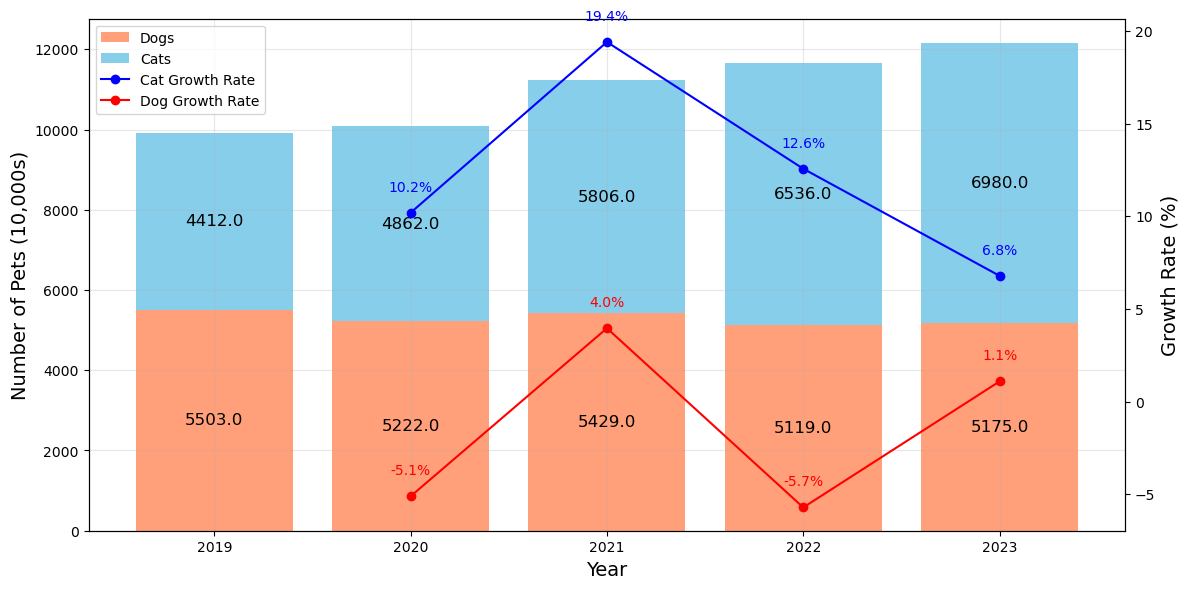

In [2]:
import numpy as np

# 提取数据
years = data.columns
cats = data.loc['Cat']
dogs = data.loc['Dog']


# 计算总数和变化率
total_pets = cats + dogs
cat_change_rate = cats.pct_change() * 100
dog_change_rate = dogs.pct_change() * 100

# 绘制堆叠柱状图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制猫和狗的堆叠柱状图
bars_dogs = ax1.bar(years, dogs, label='Dogs', color='#FFA07A')
bars_cats = ax1.bar(years, cats, bottom=dogs, label='Cats', color='#87CEEB')

# 标记猫和狗的数量
for bar, dog, cat in zip(bars_dogs, dogs, cats):
    ax1.text(bar.get_x() + bar.get_width() / 2, dog / 2, f'{dog}', ha='center', va='center', color='black', fontsize=12)
    ax1.text(bar.get_x() + bar.get_width() / 2, dog + cat / 2, f'{cat}', ha='center', va='center', color='black', fontsize=12)

# 设置左侧Y轴
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Pets (10,000s)', fontsize=14)
# ax1.set_title('Pet Population and Growth Rate (2019-2023)')

# 创建右侧Y轴
ax2 = ax1.twinx()

# 绘制变化率折线图
line1, = ax2.plot(years, cat_change_rate, color='blue', marker='o', linestyle='-', label='Cat Growth Rate')
line2, = ax2.plot(years, dog_change_rate, color='red', marker='o', linestyle='-', label='Dog Growth Rate')
ax2.set_ylabel('Growth Rate (%)', fontsize=14)

# 标记变化率数值，并向上移动
for x, y in zip(years, cat_change_rate):
    ax2.text(x, y + 1, f'{y:.1f}%', ha='center', va='bottom', color='blue')  # 向上移动1个单位
for x, y in zip(years, dog_change_rate):
    ax2.text(x, y + 1, f'{y:.1f}%', ha='center', va='bottom', color='red')  # 向上移动1个单位

# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 添加网格线
ax1.grid(True, alpha=0.3)

# 显示图表
plt.tight_layout()
plt.show()

### 2.综合评价

In [3]:
data = data.transpose()
data.head()

feature,Cat,Dog,Market Size,Household Penetration Rate,Number of Pet Track Investments and Financing,GDP per capita,per capita disposable income,Proportion of the population aged 65 and over,National Marriage Registration,National Urbanization Rate,E-commerce Transaction Volume
2019,4412.0,5503.0,2212.0,13.0,37.0,70892.0,30733.0,12.6,927.3,62.71,34.81
2020,4862.0,5222.0,2953.0,14.0,16.0,71965.0,32189.0,13.5,814.3,63.89,37.20
2021,5806.0,5429.0,3942.0,18.0,33.0,80976.0,35128.0,14.2,764.3,64.72,42.30
2022,6536.0,5119.0,4936.0,20.0,35.0,85698.0,36883.0,14.9,683.5,65.22,44.50
2023,6980.0,5175.0,5928.0,22.0,33.0,89358.0,39218.0,15.4,768.0,66.16,58.38


In [4]:
# 提取需要的数据
market_size = data['Market Size']
penetration_rate = data['Household Penetration Rate']
investment = data['Number of Pet Track Investments and Financing']

# 标准化处理函数
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# 标准化数据
norm_market_size = normalize(market_size)
norm_penetration_rate = normalize(penetration_rate)
norm_investment = normalize(investment)

# 计算综合得分
weights = {'market_size': 0.4, 'penetration_rate': 0.3, 'investment': 0.3}
data['Composite Score'] = (norm_market_size * weights['market_size'] +
                           norm_penetration_rate * weights['penetration_rate'] +
                           norm_investment * weights['investment'])

# 分析猫和狗的市场发展
cats = data['Cat']
dogs = data['Dog']
total_pets = cats + dogs

data['Cat Market Share'] = cats / total_pets
data['Dog Market Share'] = dogs / total_pets

# 打印结果
print(data[['Composite Score', 'Cat Market Share', 'Dog Market Share']])

feature  Composite Score  Cat Market Share  Dog Market Share
2019            0.300000          0.444982          0.555018
2020            0.113097          0.482150          0.517850
2021            0.595746          0.516778          0.483222
2022            0.797980          0.560789          0.439211
2023            0.942857          0.574249          0.425751


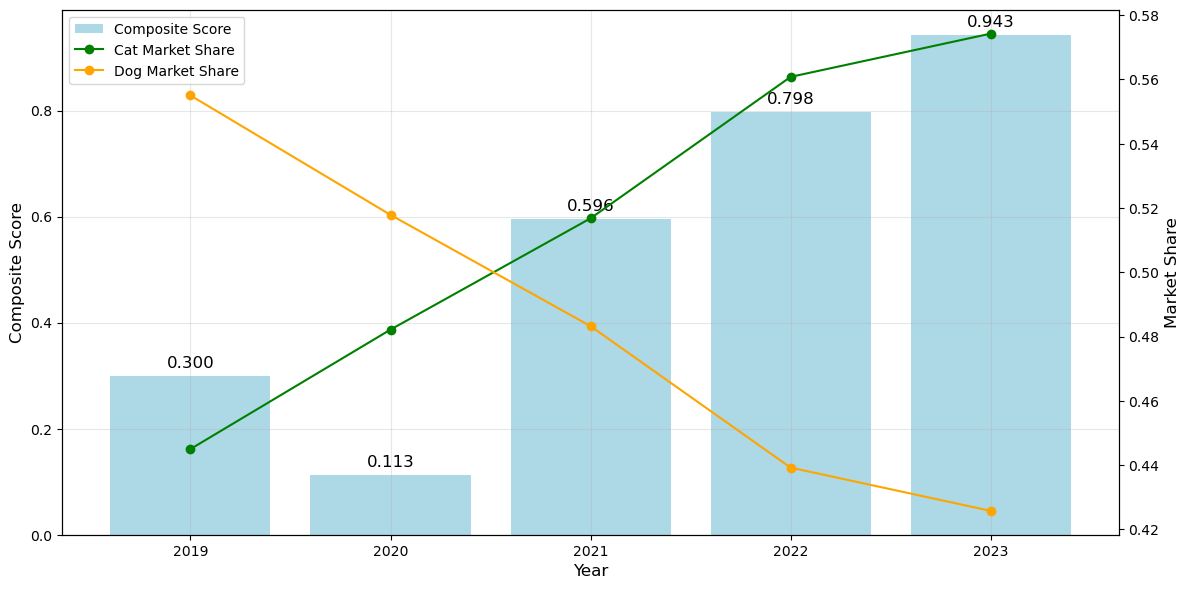

In [5]:
# 可视化
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制综合得分的柱状图
bars = ax1.bar(data.index, data['Composite Score'], color='lightblue', label='Composite Score')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Composite Score', fontsize=12)
# ax1.set_title('Pet Industry Composite Score and Market Share (2019-2023)')

# 在柱状图上标记得分数值
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=12)

# 创建第二个y轴
ax2 = ax1.twinx()

# 绘制猫和狗市场份额的折线图
line1, = ax2.plot(data.index, data['Cat Market Share'], color='green', marker='o', linestyle='-', label='Cat Market Share')
line2, = ax2.plot(data.index, data['Dog Market Share'], color='orange', marker='o', linestyle='-', label='Dog Market Share')
ax2.set_ylabel('Market Share', fontsize=12)

# 合并图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + [line1, line2], labels + labels2, loc='upper left')

# 添加网格线
ax1.grid(True, alpha=0.3)

# 显示图表
plt.tight_layout()
plt.show()

### 3.影响因素分析

In [6]:
data

feature,Cat,Dog,Market Size,Household Penetration Rate,Number of Pet Track Investments and Financing,GDP per capita,per capita disposable income,Proportion of the population aged 65 and over,National Marriage Registration,National Urbanization Rate,E-commerce Transaction Volume,Composite Score,Cat Market Share,Dog Market Share
2019,4412.0,5503.0,2212.0,13.0,37.0,70892.0,30733.0,12.6,927.3,62.71,34.81,0.300000,0.444982,0.555018
2020,4862.0,5222.0,2953.0,14.0,16.0,71965.0,32189.0,13.5,814.3,63.89,37.20,0.113097,0.482150,0.517850
2021,5806.0,5429.0,3942.0,18.0,33.0,80976.0,35128.0,14.2,764.3,64.72,42.30,0.595746,0.516778,0.483222
2022,6536.0,5119.0,4936.0,20.0,35.0,85698.0,36883.0,14.9,683.5,65.22,44.50,0.797980,0.560789,0.439211
2023,6980.0,5175.0,5928.0,22.0,33.0,89358.0,39218.0,15.4,768.0,66.16,58.38,0.942857,0.574249,0.425751


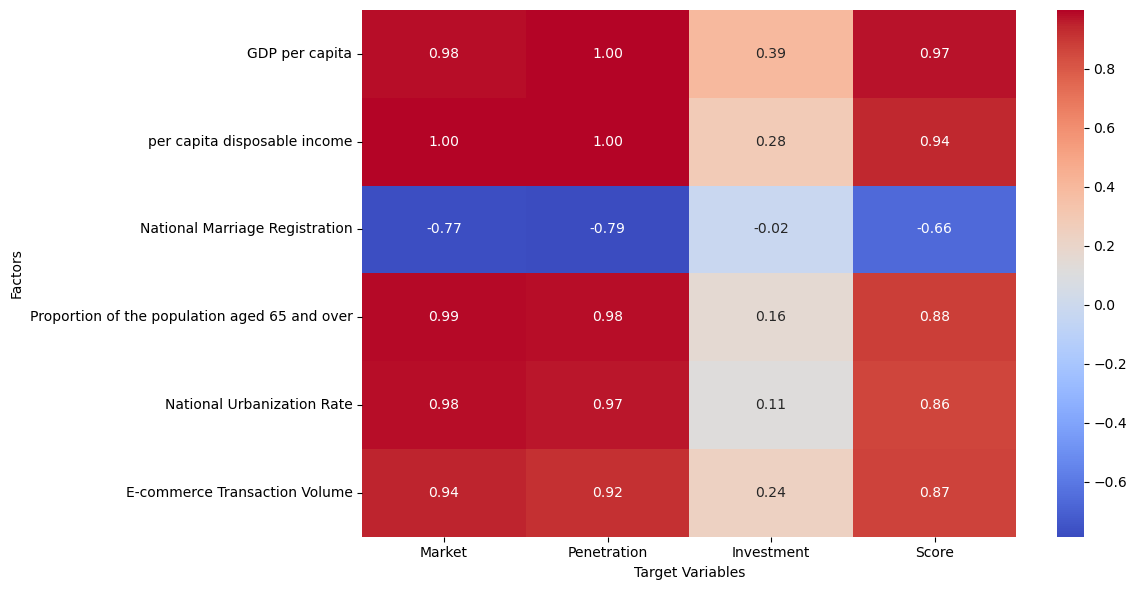

In [7]:
import seaborn as sns
# 提取影响因素
factors = data[['GDP per capita', 'per capita disposable income', 
                'National Marriage Registration', 'Proportion of the population aged 65 and over', 
                'National Urbanization Rate', 'E-commerce Transaction Volume']]

# 创建名称映射字典
name_mapping = {
    'Market Size': 'Market',
    'Household Penetration Rate': 'Penetration',
    'Number of Pet Track Investments and Financing': 'Investment',
    'Composite Score': 'Score'
}

# 选择要分析的目标变量
target_columns = ['Market Size', 'Household Penetration Rate', 
                 'Number of Pet Track Investments and Financing', 'Composite Score']

# 计算相关性
correlation_matrix = pd.DataFrame(index=factors.columns)
for col in target_columns:
    correlation_matrix[name_mapping[col]] = factors.corrwith(data[col])

# 可视化
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation between Factors and Target Variables')
plt.xlabel('Target Variables')
plt.ylabel('Factors')
plt.tight_layout()
plt.show()

### 4.预测未来三年的发展

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression

# 时间序列预测
def predict_with_time_series(data, steps=3):
    model = ExponentialSmoothing(data, trend='add', seasonal=None).fit()
    forecast = model.forecast(steps)
    future_years = pd.Index(range(2024, 2027), name='Year')
    return pd.Series(forecast.values, index=future_years), model

# 特征修正
def adjust_with_features(base_prediction, features, target):
    # 计算历史数据的年度增长
    historical_growth = np.diff(target)
    
    # 使用特征预测增长率的调整
    model = LinearRegression().fit(features[:-1], historical_growth)
    
    adjusted_predictions = []
    current_value = target[-1]
    
    for i, base_value in enumerate(base_prediction):
        # # 动态获取新的growth_adjustment
        if i < len(features) - 1:
            growth_adjustment = model.predict(features[i].reshape(1, -1))[0]
        else:
            growth_adjustment = model.predict(features[-1].reshape(1, -1))[0]
        growth_adjustment = model.predict(features[-1].reshape(1, -1))[0]
        
        # 结合时间序列预测和特征调整
        base_growth = base_value - current_value
        adjusted_growth = (base_growth + growth_adjustment) / 2  # 可以调整权重
        next_value = current_value + adjusted_growth
        adjusted_predictions.append(next_value)
        current_value = next_value
    
    return pd.Series(adjusted_predictions, index=base_prediction.index)

# 预测未来三年的市场规模
ts_prediction_market_size, ms_model = predict_with_time_series(market_size)

adjusted_market_size = adjust_with_features(ts_prediction_market_size, factors.values, market_size.values)

# 预测未来三年的渗透率
ts_prediction_penetration_rate, pr_model = predict_with_time_series(penetration_rate)
adjusted_penetration_rate = adjust_with_features(ts_prediction_penetration_rate, factors.values, penetration_rate.values)

# 预测未来三年的投融资数量
ts_prediction_investment, inves_model = predict_with_time_series(investment)
adjusted_investment = adjust_with_features(ts_prediction_investment, factors.values, investment.values)

# 打印调整后的预测结果
print("\nAdjusted Market Size Prediction (2024-2026):")
print(adjusted_market_size.round(2))
print("\nAdjusted Penetration Rate Prediction (2024-2026):")
print(adjusted_penetration_rate.round(2))
print("\nAdjusted Investment Prediction (2024-2026):")
print(adjusted_investment.round(2))


Adjusted Market Size Prediction (2024-2026):
Year
2024    7165.87
2025    8255.55
2026    9271.14
dtype: float64

Adjusted Penetration Rate Prediction (2024-2026):
Year
2024    24.23
2025    26.55
2026    28.90
dtype: float64

Adjusted Investment Prediction (2024-2026):
Year
2024    62.36
2025    77.59
2026    85.75
dtype: float64


c:\Users\admin\.conda\envs\gpu_torch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
c:\Users\admin\.conda\envs\gpu_torch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
c:\Users\admin\.conda\envs\gpu_torch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


In [9]:
def calculate_composite_score(market_size, penetration_rate, investment):
    # 标准化处理函数
    def normalize(series):
        return (series - series.min()) / (series.max() - series.min())
    
    # 标准化各个指标
    norm_market_size = normalize(market_size)
    norm_penetration_rate = normalize(penetration_rate)
    norm_investment = normalize(investment)
    
    # 设置权重
    weights = {
        'market_size': 0.4,
        'penetration_rate': 0.3,
        'investment': 0.3
    }
    
    # 计算综合得分
    composite_score = (norm_market_size * weights['market_size'] +
                      norm_penetration_rate * weights['penetration_rate'] +
                      norm_investment * weights['investment'])
    
    # 确保返回的Series具有正确的索引
    if isinstance(market_size, pd.Series):
        composite_score.index = market_size.index
    
    return composite_score

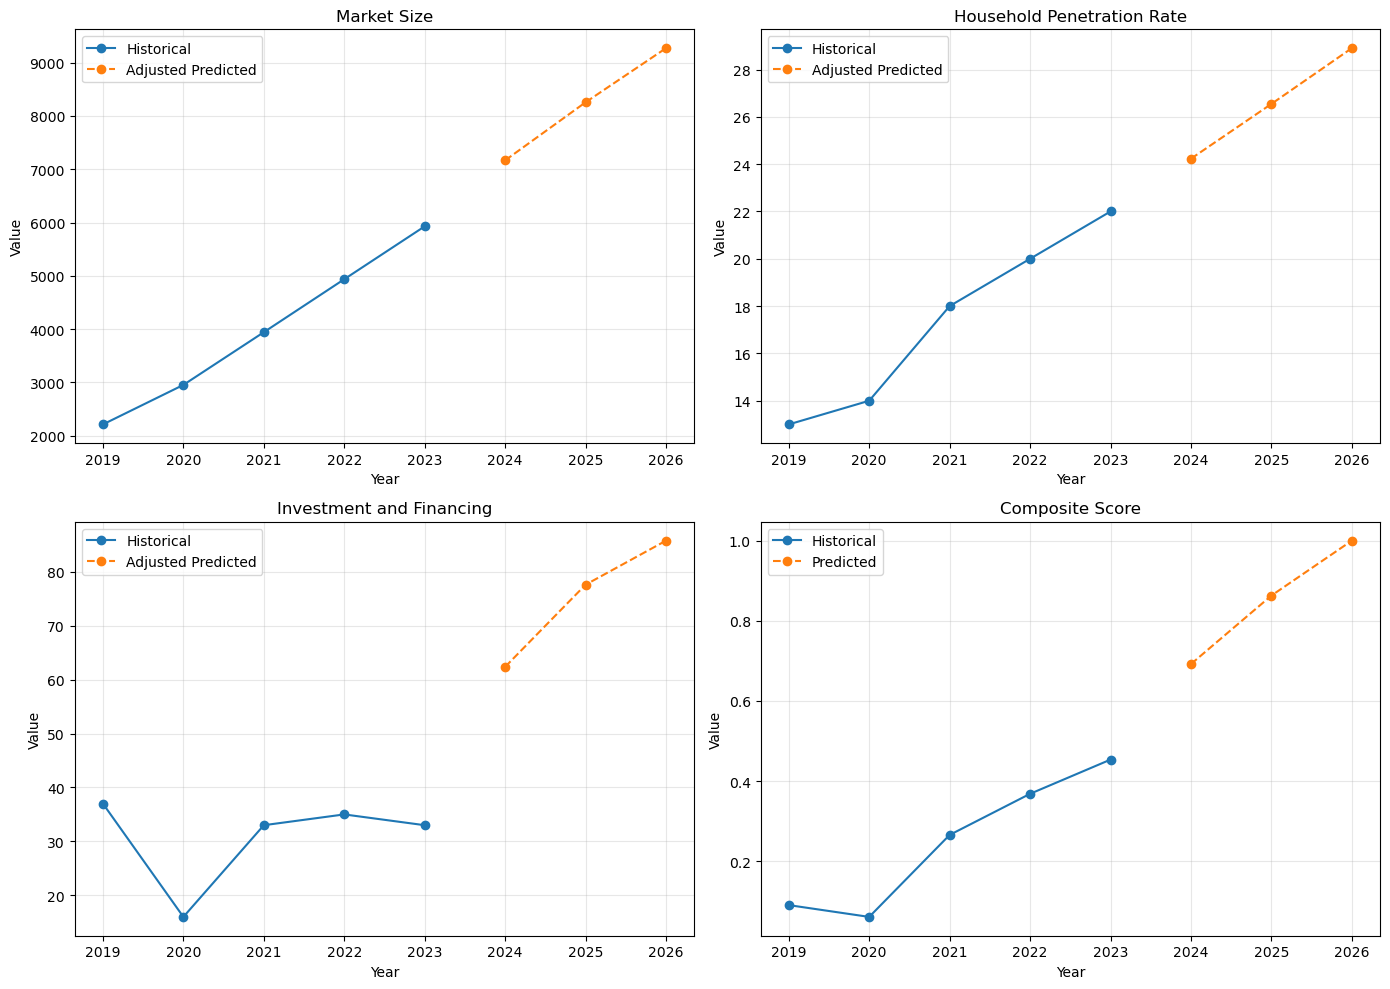

In [10]:
# 可视化未来三年数据
years = np.array(range(2019, 2027))
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 绘制市场规模
axs[0, 0].plot(years[:5], market_size, marker='o', label='Historical')
axs[0, 0].plot(years[5:], adjusted_market_size, 
               marker='o', linestyle='--', label='Adjusted Predicted')
axs[0, 0].set_title('Market Size')
axs[0, 0].legend()

# 绘制渗透率
axs[0, 1].plot(years[:5], penetration_rate, marker='o', label='Historical')
axs[0, 1].plot(years[5:], adjusted_penetration_rate, 
               marker='o', linestyle='--', label='Adjusted Predicted')
axs[0, 1].set_title('Household Penetration Rate')
axs[0, 1].legend()

# 绘制投融资数量
axs[1, 0].plot(years[:5], investment, marker='o', label='Historical')
axs[1, 0].plot(years[5:], adjusted_investment, 
               marker='o', linestyle='--', label='Adjusted Predicted')
axs[1, 0].set_title('Investment and Financing')
axs[1, 0].legend()

future_scores = calculate_composite_score(
    pd.concat([market_size, adjusted_market_size]),
    pd.concat([penetration_rate, adjusted_penetration_rate]),
    pd.concat([investment, adjusted_investment])
)

axs[1, 1].plot(years[:5], future_scores[:5], marker='o', label='Historical')
axs[1, 1].plot(years[5:], future_scores[5:], 
               marker='o', linestyle='--', label='Predicted')
axs[1, 1].set_title('Composite Score')
axs[1, 1].legend()

# 添加网格和标签
for ax in axs.flat:
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# 模型评估

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model_performance(actual_values, fitted_values):
    """
    计算并打印模型的评估指标。

    参数:
    actual_values (array-like): 实际值。
    fitted_values (array-like): 模型拟合值。

    返回:
    dict: 包含各项评估指标的字典。
    """
    mse = mean_squared_error(actual_values, fitted_values)
    mae = mean_absolute_error(actual_values, fitted_values)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_values, fitted_values)

    print("\nModel Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R²): {r2:.4f}")

    return {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R-squared": r2
    }

In [12]:
ms_eval = evaluate_model_performance(market_size.values, ms_model.fittedvalues.values)
pr_eval = evaluate_model_performance(penetration_rate.values, pr_model.fittedvalues.values)
inves_eval = evaluate_model_performance(investment.values, inves_model.fittedvalues.values)

print(ms_eval)
print(pr_eval)
print(inves_eval)


Model Performance Metrics:
Mean Squared Error (MSE): 5081.26
Root Mean Squared Error (RMSE): 71.28
Mean Absolute Error (MAE): 60.76
R-squared (R²): 0.9971

Model Performance Metrics:
Mean Squared Error (MSE): 0.32
Root Mean Squared Error (RMSE): 0.57
Mean Absolute Error (MAE): 0.48
R-squared (R²): 0.9730

Model Performance Metrics:
Mean Squared Error (MSE): 54.54
Root Mean Squared Error (RMSE): 7.39
Mean Absolute Error (MAE): 5.48
R-squared (R²): 0.0425
{'MSE': 5081.260075722052, 'RMSE': 71.28295782108127, 'MAE': 60.7600106919128, 'R-squared': 0.9971420291049037}
{'MSE': 0.3200000209413222, 'RMSE': 0.5656854434589264, 'MAE': 0.48004157809745357, 'R-squared': 0.9729729712042802}
{'MSE': 54.54000081271054, 'RMSE': 7.3851202300782175, 'MAE': 5.480000201306912, 'R-squared': 0.04248594078808732}
